# **Step 1: Sample**



In [1]:
import pandas as pd

# Load the dataset
dataset_path = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/crisp-dm_semma_kdd_assignment/dataset/semma_wine_quality_train.csv'
wine_df = pd.read_csv(dataset_path)

# Show the first few rows of the dataset
wine_df.head(), wine_df.shape


(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  Id  
 0      9.4        5   0  
 1      9.8       

**Sample Phase Analysis:**

**Dataset Structure:** The dataset has 1123 rows and 13 columns.
Features: The dataset includes the following features:
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol

**Target Variable:** The column labeled quality is the target variable we're interested in predicting.

**Identifier:** The column labeled Id is an identifier for each record and may not be useful for modeling.

# **Step 2: Explore**

**Checking for Missing Values**

In [2]:
# Check for missing values in the dataset
missing_values_count = wine_df.isnull().sum()
missing_values_count


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

No missing values are present in any of the columns.

**Understanding the Distribution of Numeric Features**


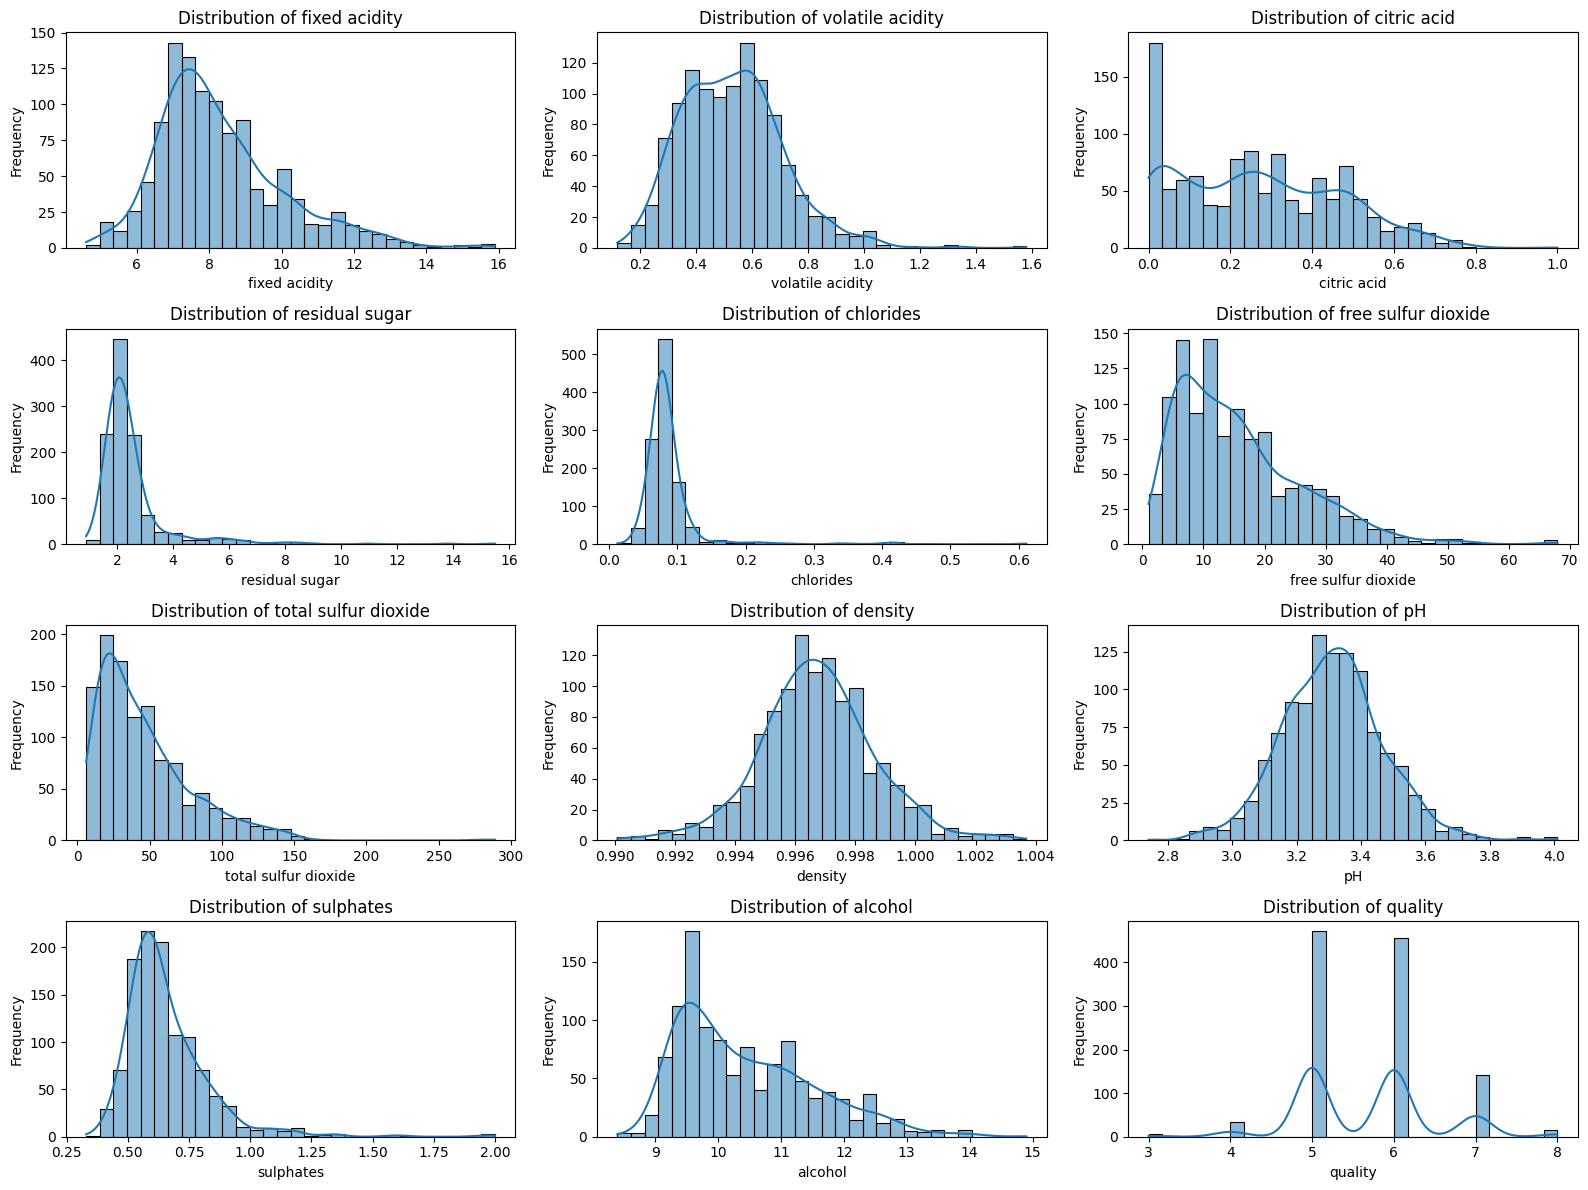

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,8.305966,0.530997,0.268112,2.529341,0.087045,15.705699,46.057435,0.996727,3.311362,0.658727,10.438498,5.659840,806.904720
std,1.741920,0.179444,0.196648,1.359056,0.047643,10.285734,32.927262,0.001915,0.157266,0.170882,1.076794,0.807749,464.159531
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.397500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,412.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,797.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.500000,0.997835,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numeric features
summary_stats = wine_df.describe()

# Plot histograms for numeric features
plt.figure(figsize=(16, 12))
for i, col in enumerate(wine_df.columns[:-1], 1):  # Excluding the 'Id' column
    plt.subplot(4, 3, i)
    sns.histplot(wine_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

summary_stats


**Summary Statistics:**

The features have different scales and ranges, suggesting that scaling might be beneficial for modeling.


Some features like residual sugar, free sulfur dioxide, and total sulfur dioxide show a wide range, indicating potential outliers or skewness.

**Histograms:**

Most features appear to be somewhat normally distributed, but some like residual sugar, free sulfur dioxide, and total sulfur dioxide are positively skewed.

The alcohol feature has a slightly bimodal distribution.

**Understanding the Distribution of the Target Variable (quality)**

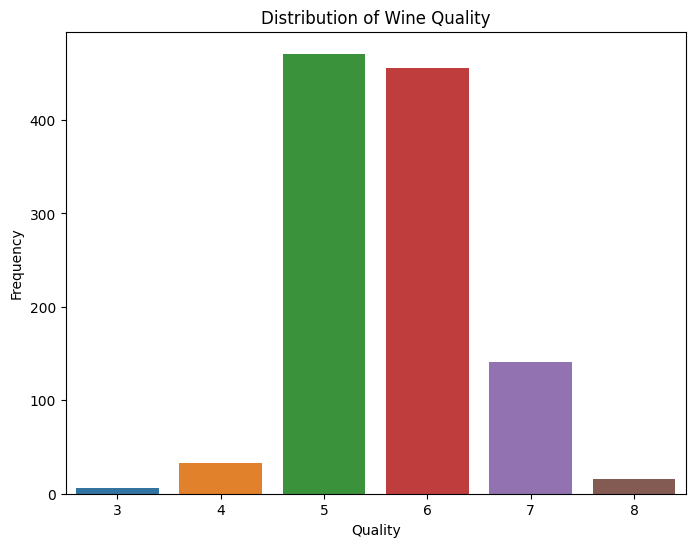

In [4]:
# Plot the distribution of the target variable 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(data=wine_df, x='quality')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()


The **target variable quality** appears to be imbalanced, with most wines having a quality rating of 5 or 6. There are fewer wines with extremely low or high quality ratings.

**Explore Correlations**

let's explore the correlations between the features and the target variable to see which features are most strongly related to quality.

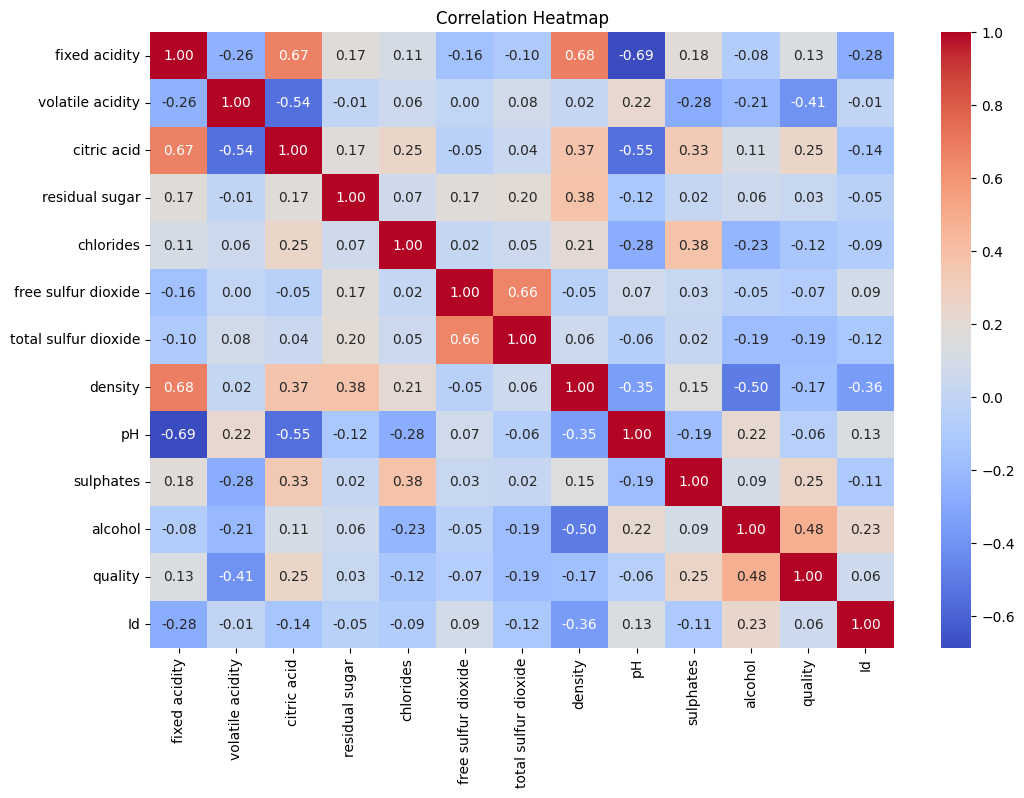

quality                 1.000000
alcohol                 0.482402
sulphates               0.252107
citric acid             0.245532
fixed acidity           0.129778
Id                      0.063665
residual sugar          0.025134
pH                     -0.058511
free sulfur dioxide    -0.069988
chlorides              -0.123687
density                -0.167994
total sulfur dioxide   -0.188546
volatile acidity       -0.407025
Name: quality, dtype: float64

In [5]:
# Calculate correlations
correlation_matrix = wine_df.corr()

# Plot heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Show correlations with the target variable 'quality'
correlation_with_target = correlation_matrix['quality'].sort_values(ascending=False)
correlation_with_target


**Heatmap:**

The heatmap gives us an overall view of how each feature correlates with every other feature. Darker shades represent stronger correlations.

**Correlations with Target Variable (quality):**

**Alcohol** has a positive correlation of 0.48 with quality, suggesting that higher alcohol content generally corresponds to better wine quality.

**Sulphates** and **Citric acid** also have positive correlations with quality, but they are less strong.

**Volatile acidity** has a negative correlation of -0.41 with quality, indicating that higher volatile acidity generally corresponds to lower wine quality.

Other features have relatively weaker correlations with quality.


# **Step 3: Modify**

**Feature Scaling**


In [7]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_columns = [col for col in wine_df.columns if col not in ['quality', 'Id']]

# Initialize scaler
scaler = StandardScaler()

# Scale the features
wine_df_scaled = wine_df.copy()
wine_df_scaled[scale_columns] = scaler.fit_transform(wine_df[scale_columns])

# Show first few rows of scaled data
wine_df_scaled.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.520328,0.942234,-1.364020,-0.463279,-0.231940,-0.457701,-0.366347,0.560421,1.263634,-0.578005,-0.964865,5,0
1,-0.290594,1.945780,-1.364020,0.052014,0.230032,0.904013,0.636308,0.037954,-0.708433,0.124547,-0.593226,5,1
2,-0.290594,1.276749,-1.160520,-0.168825,0.104040,-0.068640,0.241323,0.142448,-0.326742,-0.051091,-0.593226,5,2
3,1.662144,-1.399375,1.484978,-0.463279,-0.252938,0.125891,0.423624,0.664915,-0.962893,-0.460913,-0.593226,6,3
4,-0.520328,0.942234,-1.364020,-0.463279,-0.231940,-0.457701,-0.366347,0.560421,1.263634,-0.578005,-0.964865,5,4


We've scaled the features using standard scaling, which transforms the features to have zero mean and unit variance.

The scaled dataset retains all original columns, and the scaling is only applied to the feature columns, not the target variable quality or the identifier Id.


**Feature Selection**

Based on the correlation analysis, all the features show some level of correlation with the target variable, quality. Hence, we may keep all the features for now. Feature importance can be assessed later after model training.

**Handling Imbalanced Data**

There are multiple ways to handle imbalanced data, including over-sampling the minority class, under-sampling the majority class, or using ensemble techniques. However, given that this is a regression problem, the imbalanced nature of the target variable is less of an issue compared to classification tasks.

**Data Splitting**

In [8]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = wine_df_scaled[scale_columns]
y = wine_df_scaled['quality']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the resulting sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((898, 11), (225, 11), (898,), (225,))

The data has been successfully split into training and validation sets.

The training set contains 898 samples, and the validation set contains 225 samples.

Both sets include 11 features.


# **Step 4: Model**

**Train the Random Forest Regressor Model**

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict the target variable for the validation set
y_val_pred = rf_model.predict(X_val)

# Calculate the performance metrics for the validation set
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)

rmse, r2


(0.5816023842225316, 0.44085156403056225)

**Root Mean Square Error (RMSE):**

The RMSE value on the validation set is approximately 0.582. This value provides an idea of how much error the system typically makes in its predictions. Lower values of RMSE indicate better fit.

**R2 Score**

The R2 scoreon the validation set is approximately 0.441. This metric provides an indication of the goodness of fit of the model. An R2 score close to 1 indicates that the model explains a large proportion of the variance in the response variable.



# **Step 5: Assess**

**Reviewing Model Performance**

The Random Forest Regressor yielded an RMSE of approximately 0.582
and an R2 score of approximately 0.441 on the validation set.

**Feature Importance**

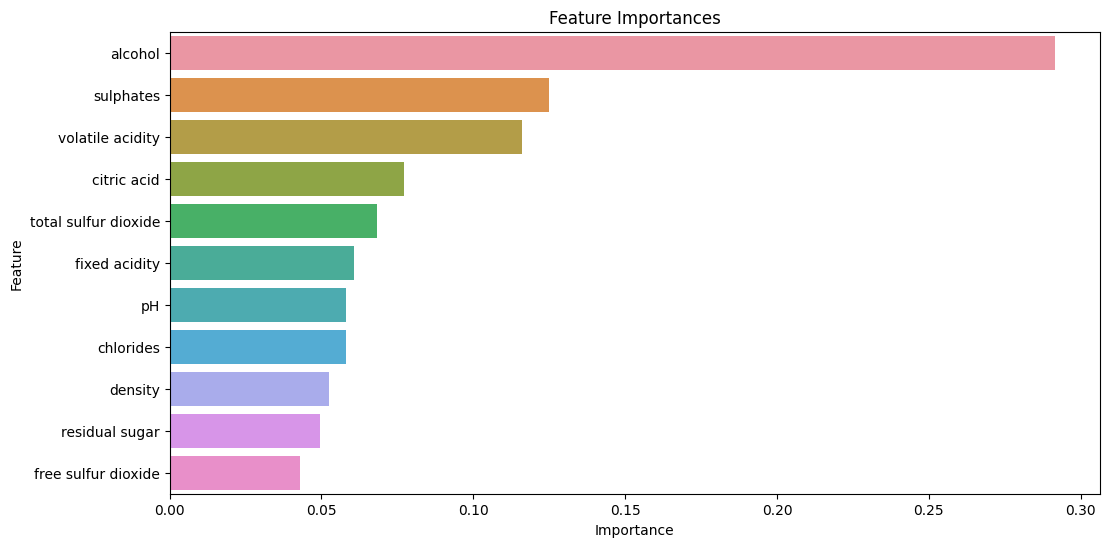

,Feature,Importance
10,alcohol,0.291663
9,sulphates,0.124852
1,volatile acidity,0.116142
2,citric acid,0.077136
6,total sulfur dioxide,0.068345
0,fixed acidity,0.060624
8,pH,0.058185
4,chlorides,0.058033
7,density,0.052586
3,residual sugar,0.049450


In [10]:
# Extract feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df


**Alcohol:** This feature is the most important for predicting wine quality, aligning well with its high correlation with the target variable.

**Sulphates and Volatile Acidity:** These features also have significant importance, which is consistent with their moderate correlation with wine quality.

The other features have relatively lower importance but still contribute to the model.